In [3]:
# Dependencies
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import plotly.express as px 
import os



In [4]:
#Read csv
fraud_data = pd.read_csv('Project-1/Resources/clean_data.csv')
fraud_data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,Date,Time,Age
0,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,33.986391,-81.200714,0,21/06/2020,12:14,56
1,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,39.450498,-109.960431,0,21/06/2020,12:14,34
2,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,40.495810,-74.196111,0,21/06/2020,12:14,54
3,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,28.812398,-80.883061,0,21/06/2020,12:15,37
4,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,44.959148,-85.884734,0,21/06/2020,12:15,69


In [5]:
#Check which hours have the most fraud before we start graphing to confirm and have an idea of where the trend is going to be 

fraud_data["Time"] = pd.to_datetime(fraud_data["Time"], format='%H:%M')

# Extract the hour component from "Time"
fraud_data["Hour"] = fraud_data["Time"].dt.hour

# Group by hour and count the number of frauds
hourly_fraud_count = fraud_data.groupby("Hour")["is_fraud"].sum()

# Print the hourly fraud counts
print("Hourly Fraud Counts:")
print(hourly_fraud_count)


Hourly Fraud Counts:
Hour
0     188
1     169
2     168
3     194
4      15
5      20
6      14
7      16
8      10
9      14
10     12
11     17
12     17
13     14
14     14
15     21
16     21
17     16
18     30
19     24
20     36
21     27
22    550
23    538
Name: is_fraud, dtype: int64


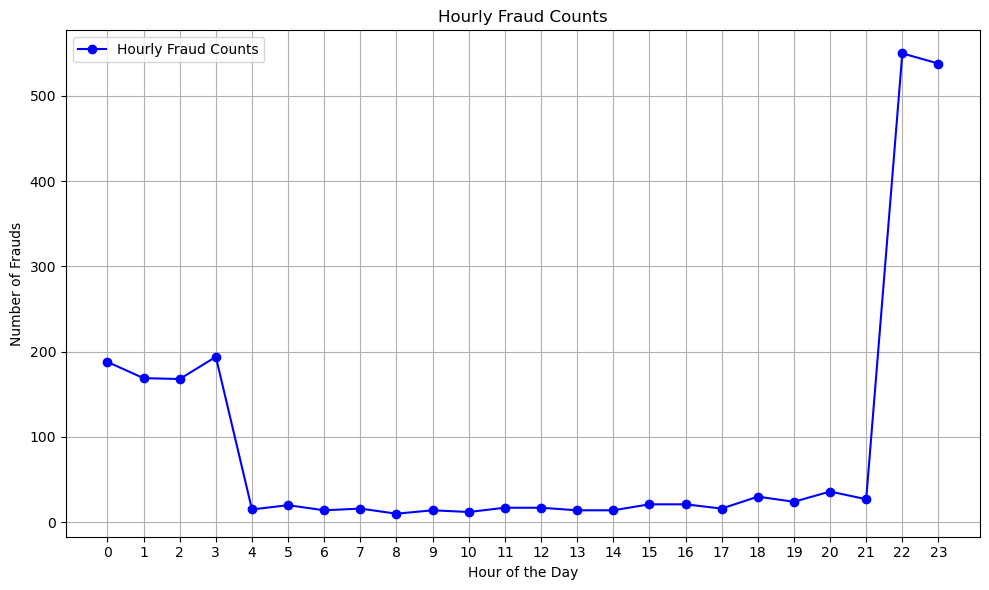

In [21]:
# Convert "Time" to datetime format with specified format
fraud_data["Time"] = pd.to_datetime(fraud_data["Time"], format='%H:%M')

# Extract the hour component from "Time"
fraud_data["Hour"] = fraud_data["Time"].dt.hour

# Group by hour and count the number of frauds
hourly_fraud_count = fraud_data.groupby("Hour")["is_fraud"].sum()

# Plot the line graph
plt.figure(figsize=(10, 6))
hourly_fraud_count.plot(kind='line', marker='o', color='blue', linestyle='-', label='Hourly Fraud Counts')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Frauds")
plt.title("Hourly Fraud Counts")
plt.xticks(range(24))  # Set x-axis ticks to show all hours of the day
plt.grid(True)
# Add legend
plt.legend()

plt.tight_layout()
plt.savefig("Project-1/Output/MohammedAli-Line-1.png")
plt.show()



In [7]:
# Convert "Date" to datetime format with corrected format
fraud_data["Date"] = pd.to_datetime(fraud_data["Date"], format='%d/%m/%Y')

# Extract the month component from "Date"
fraud_data["Month"] = fraud_data["Date"].dt.month

# Extract the hour component from "Date"
fraud_data["Hour"] = fraud_data["Date"].dt.hour

# Group by month and hour and count the number of frauds
hourly_fraud_count = fraud_data.groupby(["Month", "Hour"])["is_fraud"].sum()

# Print the hourly fraud counts for all months
print("Hourly Fraud Counts for All Months:")
print(hourly_fraud_count)

Hourly Fraud Counts for All Months:
Month  Hour
6      0       133
7      0       321
8      0       415
9      0       340
10     0       384
11     0       294
12     0       258
Name: is_fraud, dtype: int64


The month with the most frauds is August with 415 frauds.


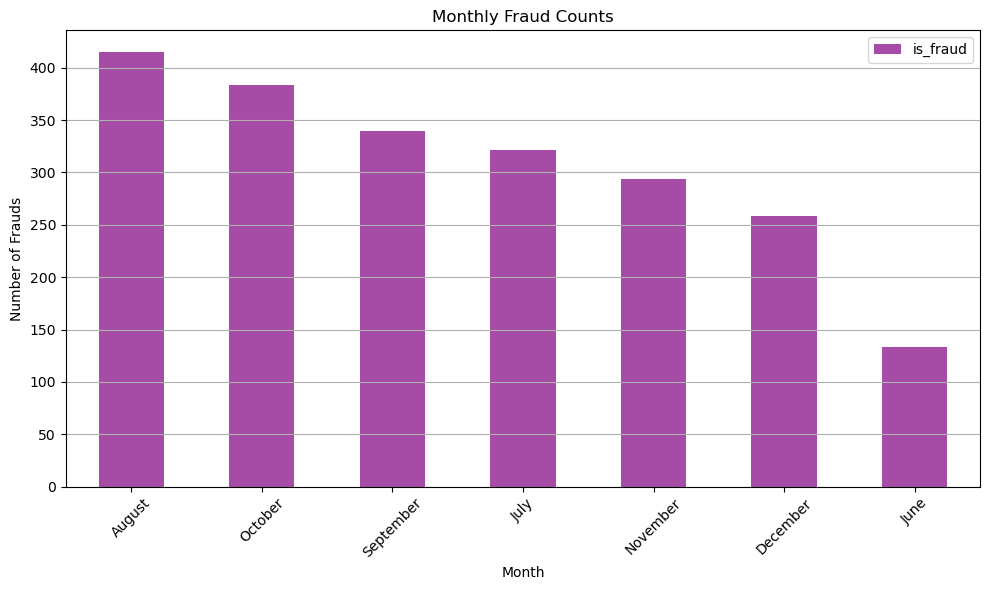

In [22]:


# Convert "Date" to datetime format with corrected format
fraud_data["Date"] = pd.to_datetime(fraud_data["Date"], format='%d/%m/%Y')

# Extract the month component from "Date"
fraud_data["Month"] = fraud_data["Date"].dt.month

# Define month names
month_names = {6: 'June',7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Replace month numbers with month names
fraud_data["Month"] = fraud_data["Month"].map(month_names)

# Group by month and count the number of frauds
monthly_fraud_count = fraud_data.groupby("Month")["is_fraud"].sum()

# Sort monthly fraud counts in descending order
monthly_fraud_count = monthly_fraud_count.sort_values(ascending=False)

# Find the month with the most frauds
most_fraud_month = monthly_fraud_count.idxmax()
max_fraud_count = monthly_fraud_count.max()

# Print the month with the most frauds
print(f"The month with the most frauds is {most_fraud_month} with {max_fraud_count} frauds.")

# Plot the bar graph
plt.figure(figsize=(10, 6))
monthly_fraud_count.plot(kind='bar', color='purple', alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Number of Frauds")
plt.title("Monthly Fraud Counts")
plt.xticks(rotation=45) 
plt.grid(axis='y')
plt.tight_layout()
plt.legend()
plt.savefig("Project-1/Output/MohammedAli-Bar-1.png")
plt.show()


In [9]:
# Convert "Date" to datetime format with corrected format
fraud_data["Date"] = pd.to_datetime(fraud_data["Date"], format='%d/%m/%Y')

# Define a list of specific dates
specific_dates = ['2020-07-01', '2020-08-03', '2020-09-07', '2020-10-31', '2020-11-11', '2020-12-25']  # Change these to your desired dates

# Convert the list of specific dates to datetime format
specific_dates = pd.to_datetime(specific_dates)

# Filter the dataframe for the specific list of dates
filtered_data = fraud_data[fraud_data["Date"].isin(specific_dates)]

# Group by date and count the number of frauds
daily_fraud_count = filtered_data.groupby("Date")["is_fraud"].sum()

# Display the daily fraud counts
print("Daily Fraud Counts:")

print(daily_fraud_count)


Daily Fraud Counts:
Date
2020-07-01     3
2020-08-03    28
2020-09-07    14
2020-10-31    13
2020-11-11     3
2020-12-25     0
Name: is_fraud, dtype: int64


In [32]:
#Plotting our line chart via plotly 
lineChart = px.line(fraud_data, x='Date', y='amt', title='Amount vs Day', 
              labels={'day': 'Day', 'amt': 'Amount'})

lineChart.show()


ValueError: 
The kaleido executable is required by the kaleido Python library, but it was not included
in the Python package and it could not be found on the system PATH.

Searched for included kaleido executable at:
    c:\Users\Moham\anaconda3\envs\inclassfeb2024\lib\site-packages\kaleido\executable\kaleido.cmd 

Searched for executable 'kaleido' on the following system PATH:
    c:\Users\Moham\anaconda3\envs\inclassfeb2024
    C:\Program Files (x86)\Common Files\Oracle\Java\javapath
    C:\Program Files\zeppelin-0.11.0-bin-all\bin
    C:\Program Files\Git\cmd
    
    C:\Program Files\Docker\Docker\resources\bin
    C:\Program Files\Git LFS
    C:\Users\Moham\AppData\Local\Programs\Microsoft VS Code\bin
    C:\Users\Moham\AppData\Local\GitHubDesktop\bin
    C:\Program Files (x86)\Common Files\Oracle\Java\javapath
    C:\Program Files\zeppelin-0.11.0-bin-all\bin
    C:\Program Files\Git\cmd
    
    C:\Program Files\Docker\Docker\resources\bin
    C:\Program Files\Git LFS
    C:\Users\Moham\AppData\Local\Programs\Microsoft VS Code\bin
    C:\Users\Moham\AppData\Local\GitHubDesktop\bin
